# Decision Tree Regression (Car Price Prediction)

## Penjelasan Kolom:

###
Identitas Mobil:
- car_ID = ID unik untuk setiap mobil.
- symboling = Rating risiko keselamatan mobil.
- CarName = Nama mobil yang berisi brand dan model.

Jenis dan Karakteristik Fisik:
- fueltype = Jenis bahan bakar (gas/diesel).
- aspiration = Tipe aspirasi mesin (std/turbo).
- doornumber = Jumlah pintu (two/four).
- carbody = Tipe bodi mobil (sedan, hatchback, etc.).
- drivewheel = Sistem penggerak roda (fwd, rwd, 4wd).
- enginelocation = Posisi mesin (front/rear).

Dimensi Mobil:
- wheelbase = Jarak antara roda depan dan belakang.
- carlength = Panjang keseluruhan mobil.
- carwidth = Lebar mobil.
- carheight = Tinggi mobil.
- curbweight = Berat mobil tanpa penumpang dan kargo.

Detail Mesin:
- enginetype = Jenis mesin (dohc, ohcv, dll.).
- cylindernumber = Jumlah silinder mesin.
- enginesize = Volume kapasitas mesin (cc).

Spesifikasi Mesin Lanjutan:
- fuelsystem = Sistem suplai bahan bakar (mpfi, 2bbl, dll.).
- boreratio = Diameter silinder mesin.
- stroke = Panjang langkah piston.
- compressionratio = Rasio kompresi mesin.
- horsepower = Tenaga maksimum mobil (HP).
- peakrpm = Putaran mesin maksimum saat mencapai tenaga puncak.

Efisiensi Bahan Bakar:
- citympg = Konsumsi bensin dalam kota (mpg).
- highwaympg = Konsumsi bensin di jalan tol (mpg).

Harga:
- price = Harga mobil dalam USD.

## A. Data Preparation

### A.1 Import Libraries

In [973]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [974]:
try:
    df = pd.read_csv('CarPrice_Assignment.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [975]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [976]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### A.4 Melihat Informasi Data

In [977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### A.5 Melihat Dimensi Data

In [978]:
df.shape

(205, 26)

### A.6 Cek Data Duplikat

In [979]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [980]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### A.8 Cek Data Unik di Class Label

In [981]:
df['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

## B. Data Preprocessing


### B.1 Cek Outliers

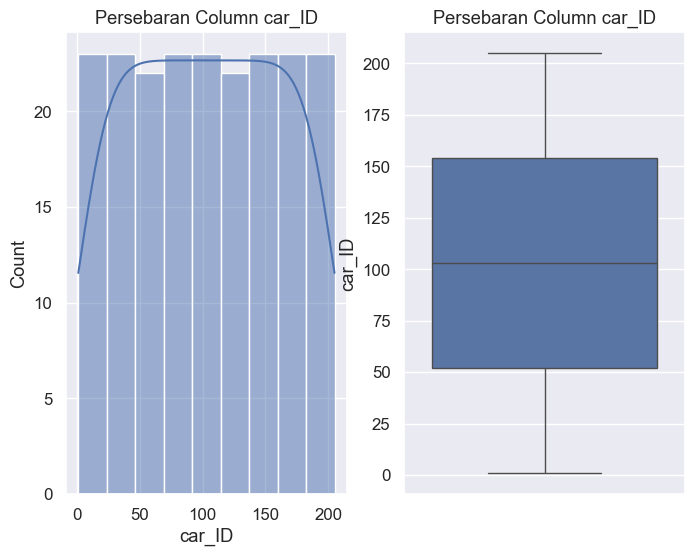

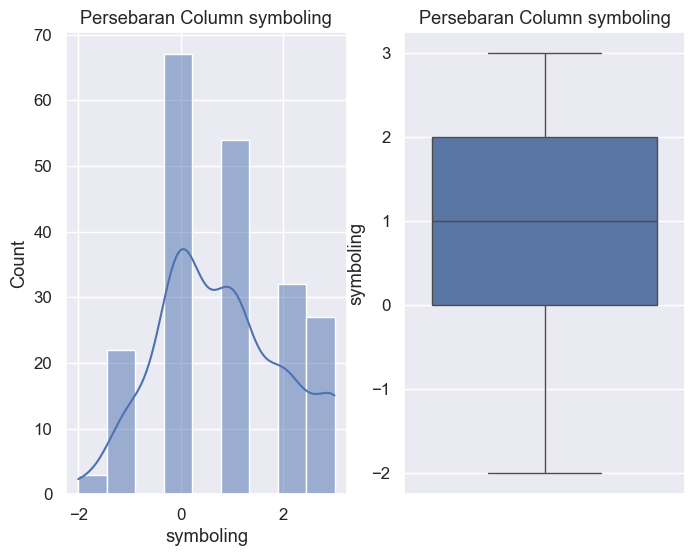

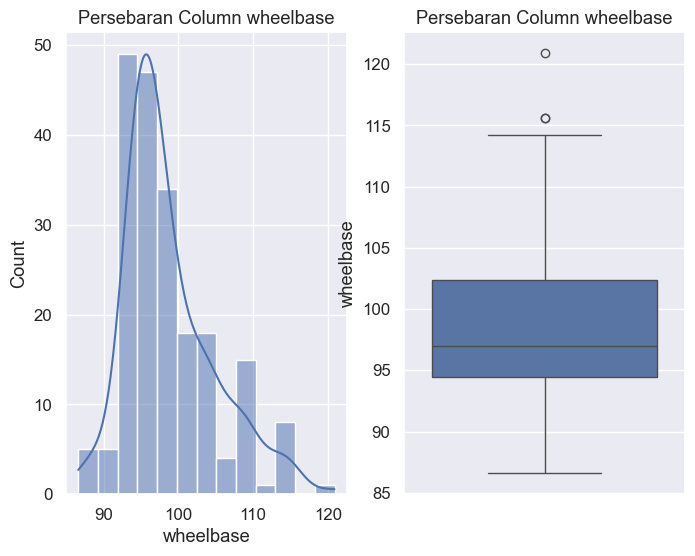

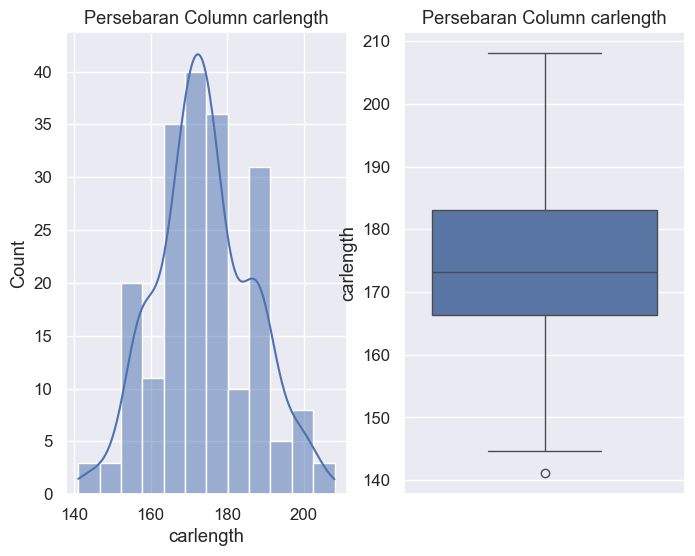

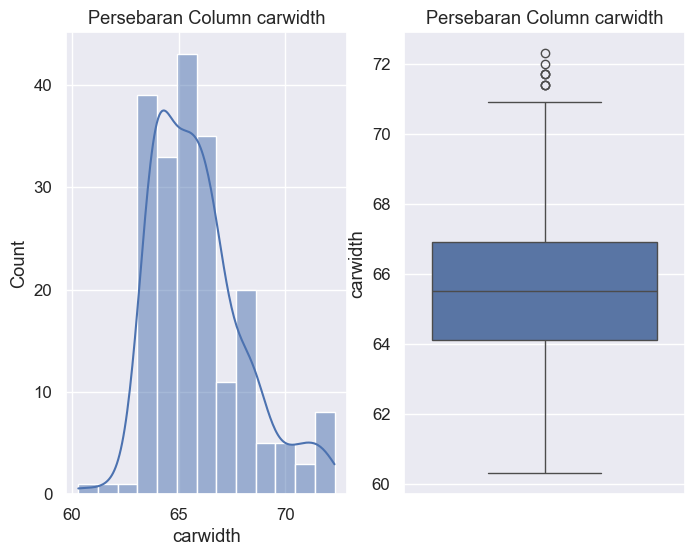

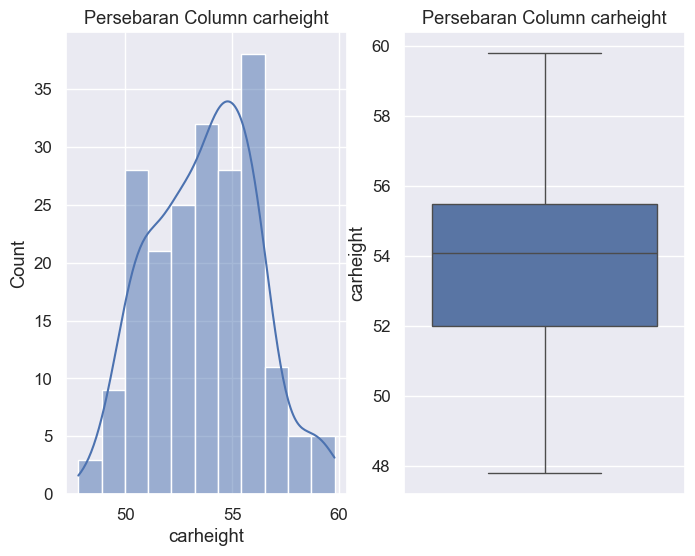

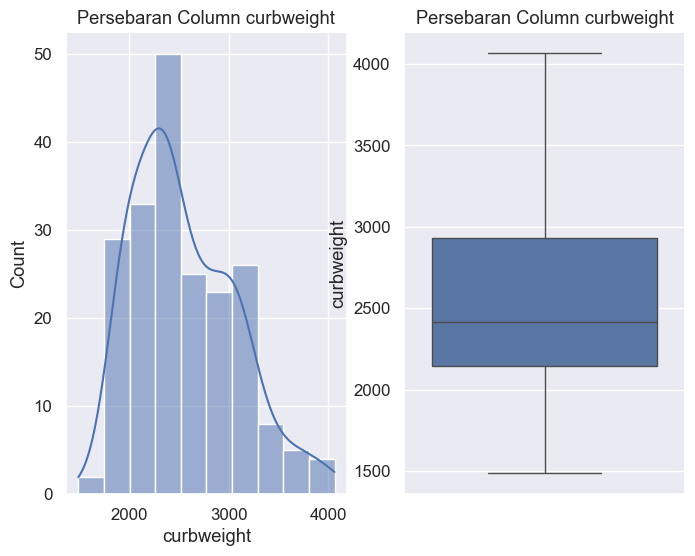

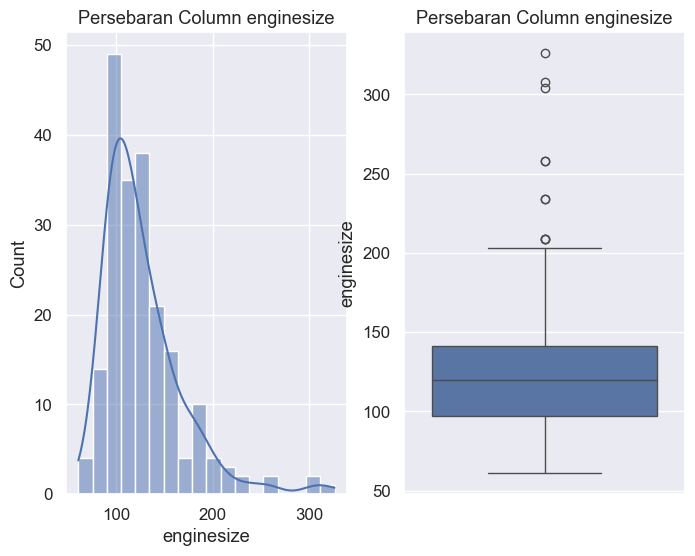

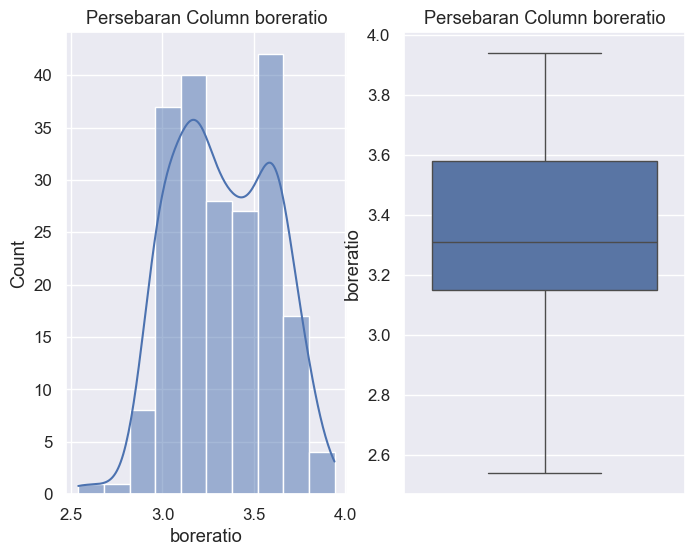

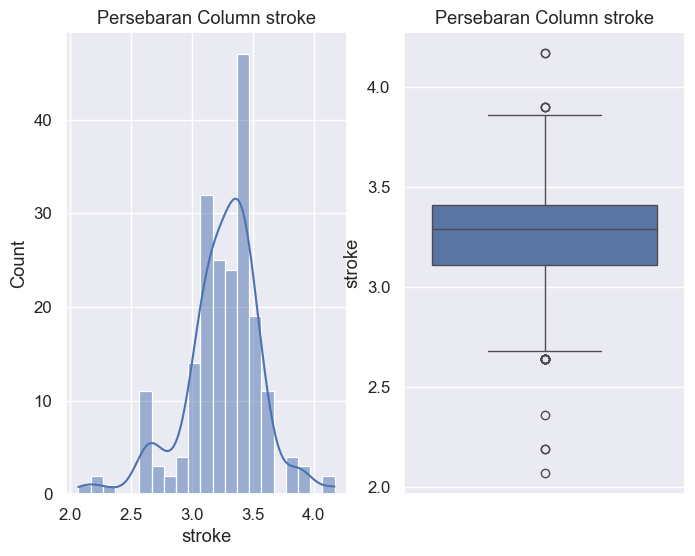

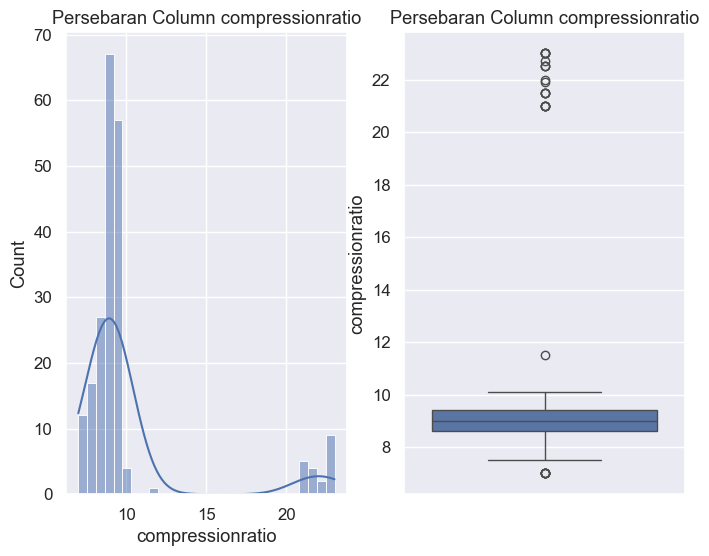

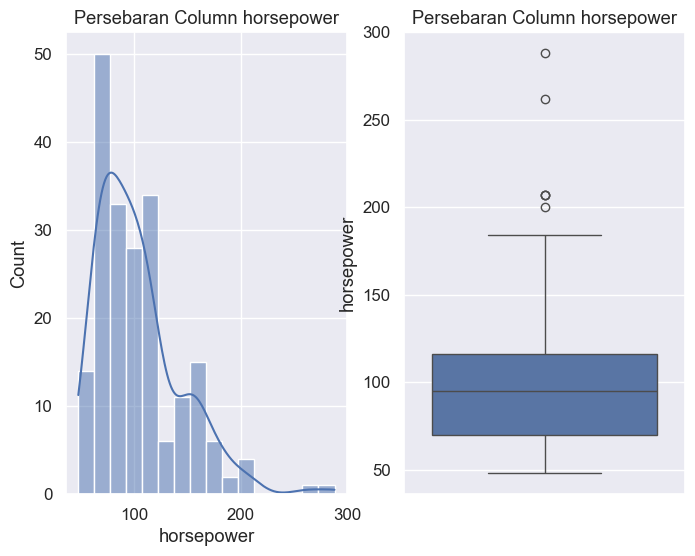

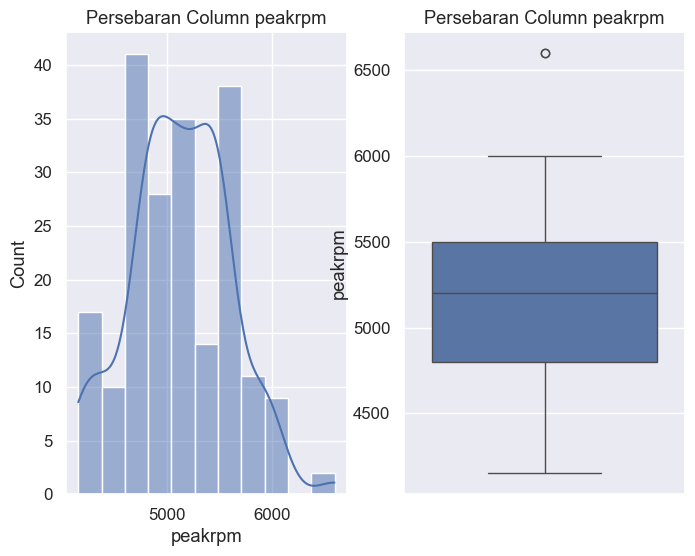

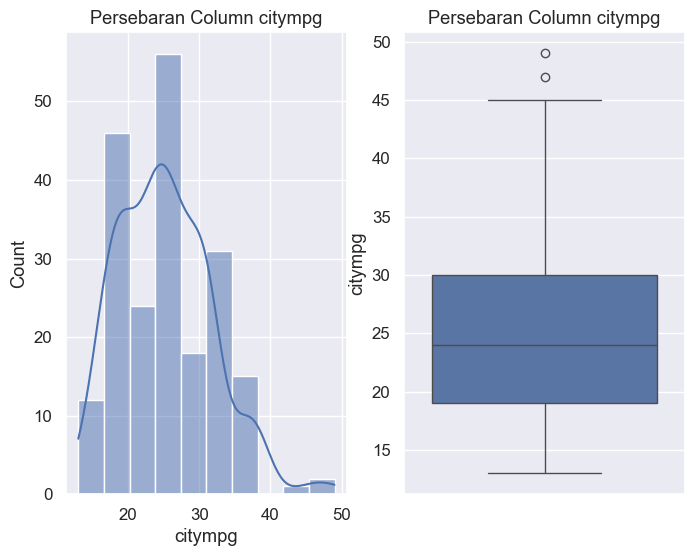

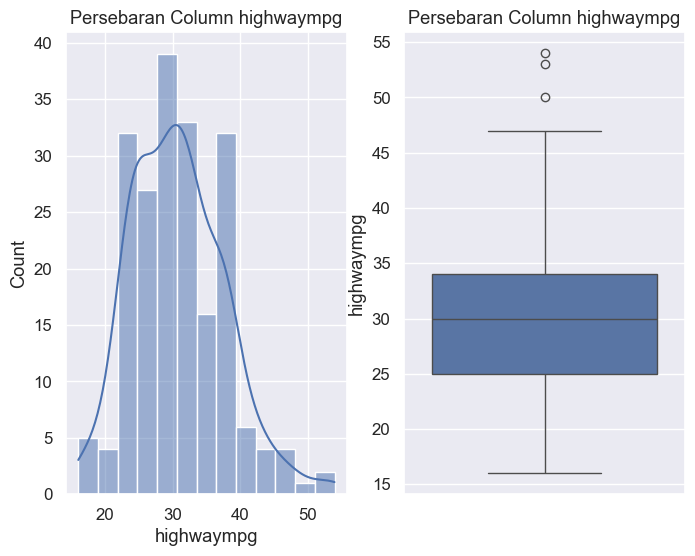

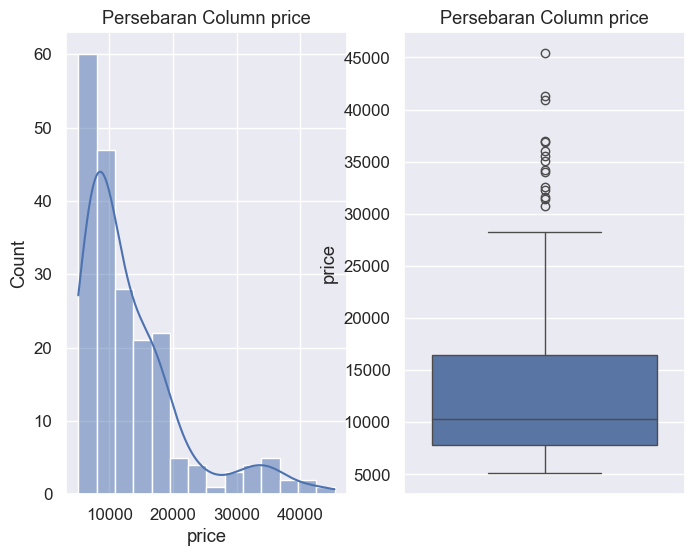

In [982]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Persebaran Column {col}")
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Column {col}")
    
    plt.show()

In [983]:
df.skew(numeric_only=True)

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

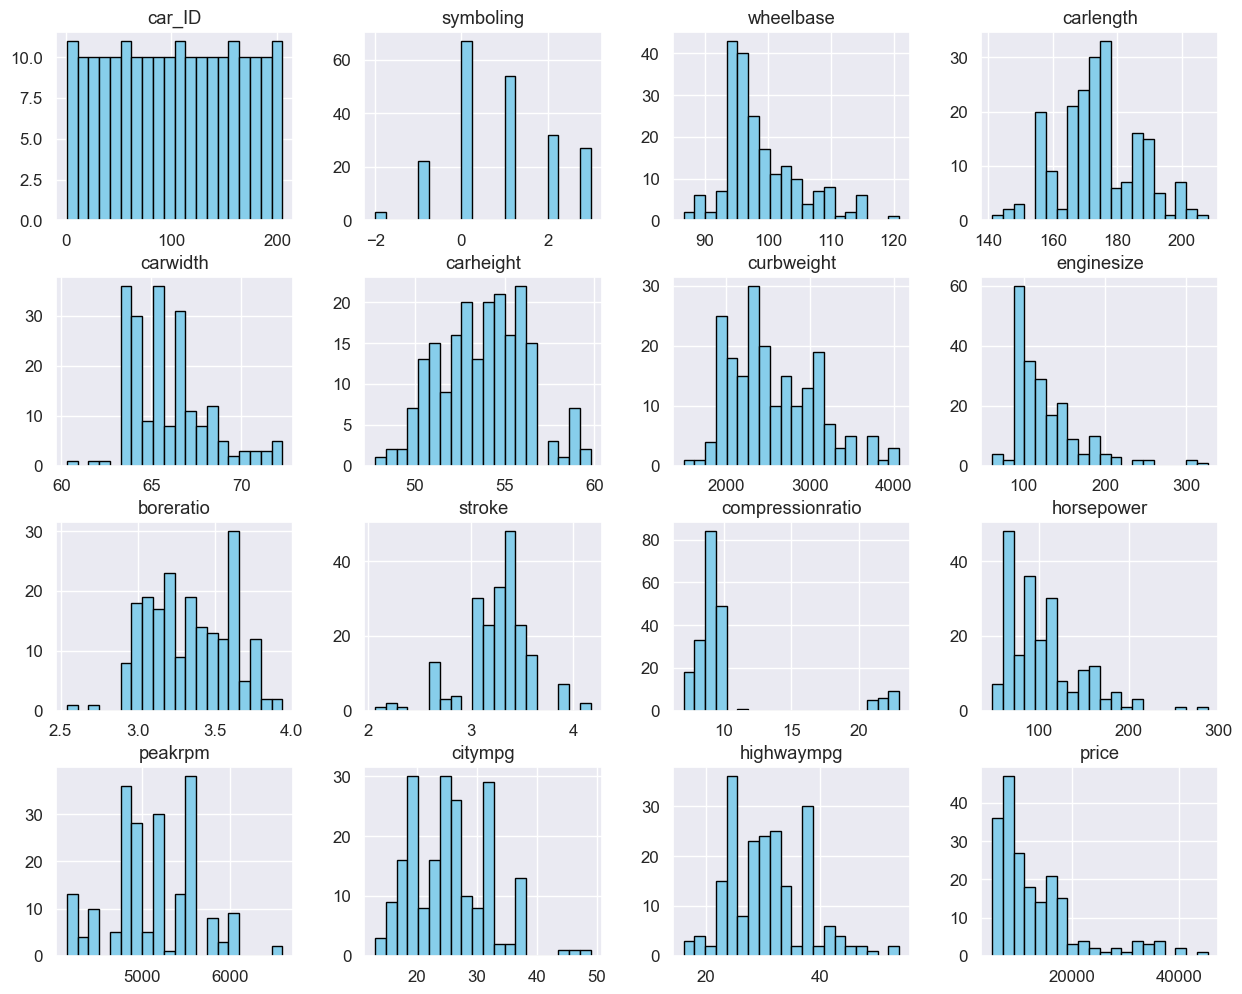

In [984]:
num = df.select_dtypes(include='number')
num.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 12))
plt.show()

### C.2 Bivariate Analysis

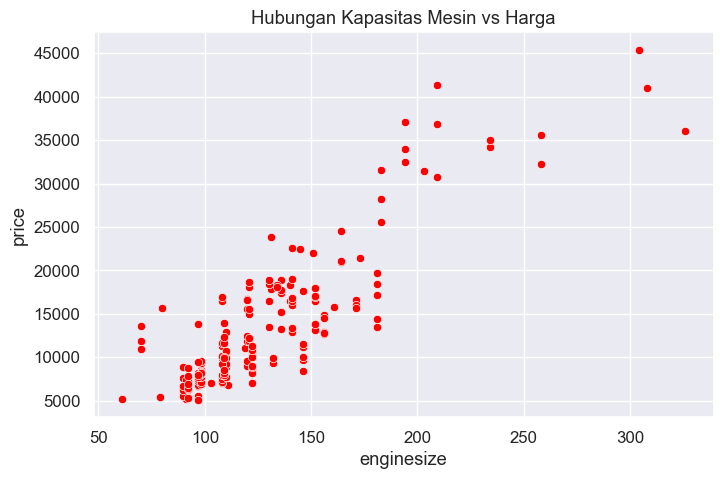

In [985]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='enginesize', y='price', data=df, color='red')
plt.title('Hubungan Kapasitas Mesin vs Harga')
plt.show()

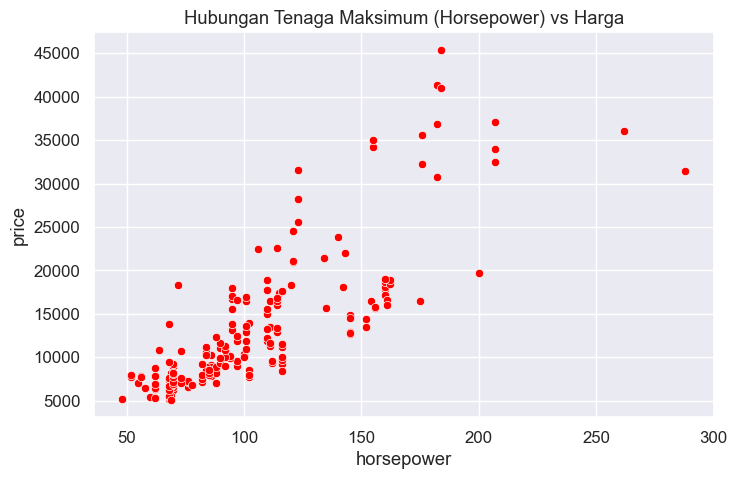

In [986]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='horsepower', y='price', data=df, color='red')
plt.title('Hubungan Tenaga Maksimum (Horsepower) vs Harga')
plt.show()

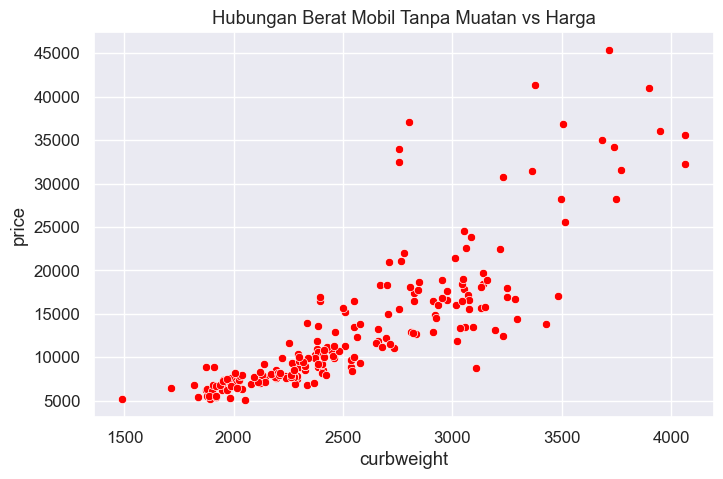

In [987]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='curbweight', y='price', data=df, color='red')
plt.title('Hubungan Berat Mobil Tanpa Muatan vs Harga')
plt.show()

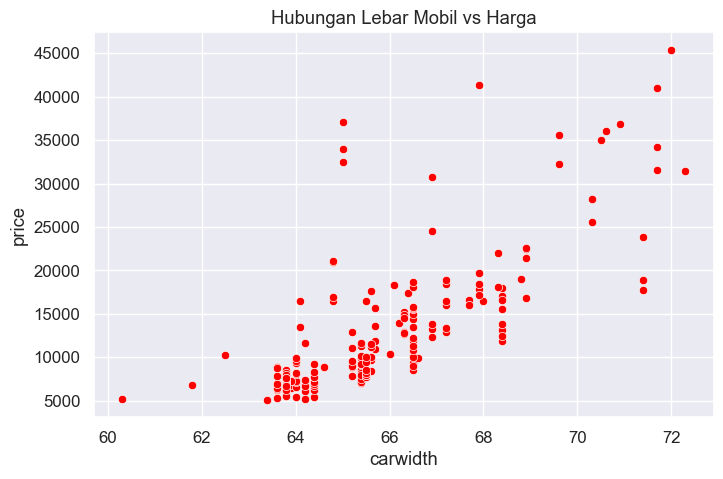

In [988]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carwidth', y='price', data=df, color='red')
plt.title('Hubungan Lebar Mobil vs Harga')
plt.show()

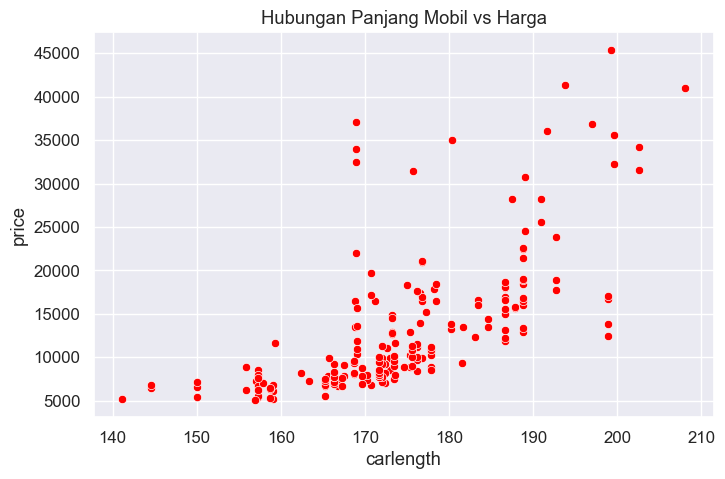

In [989]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carlength', y='price', data=df, color='red')
plt.title('Hubungan Panjang Mobil vs Harga')
plt.show()

### C.3 Encoding/Mapping

In [990]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [991]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [992]:
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# Perbaiki Typo (Wajib biar datanya bersih)
corrections = {
    'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}
df['brand'] = df['brand'].replace(corrections)

# 3. ENCODING: Ubah semua teks jadi angka
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = df[col].astype('category').cat.codes

# 4. HAPUS KOLOM TIDAK PENTING
# car_ID wajib dibuang biar ga overfit. CarName sudah diganti brand.
df = df.drop(columns=['car_ID', 'CarName'])

print("Data siap! Ukuran:", df.shape)
df.head()

Data siap! Ukuran: (205, 25)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [993]:
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = df[col].astype('category').cat.codes

df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


### C.4 Handling Outliers

In [994]:
cols_to_clean = [
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
    'peakrpm', 'citympg', 'highwaympg'
]

for col in cols_to_clean:
    df[col] = df[col].astype(float)
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    
    lowbound = Q1 - 1.5 * IQR
    upbound = Q3 + 1.5 * IQR
    
    df.loc[(df[col] < lowbound) | (df[col] > upbound), col] = df[col].mean()

### C.5 Multivariate Analysis

<Axes: >

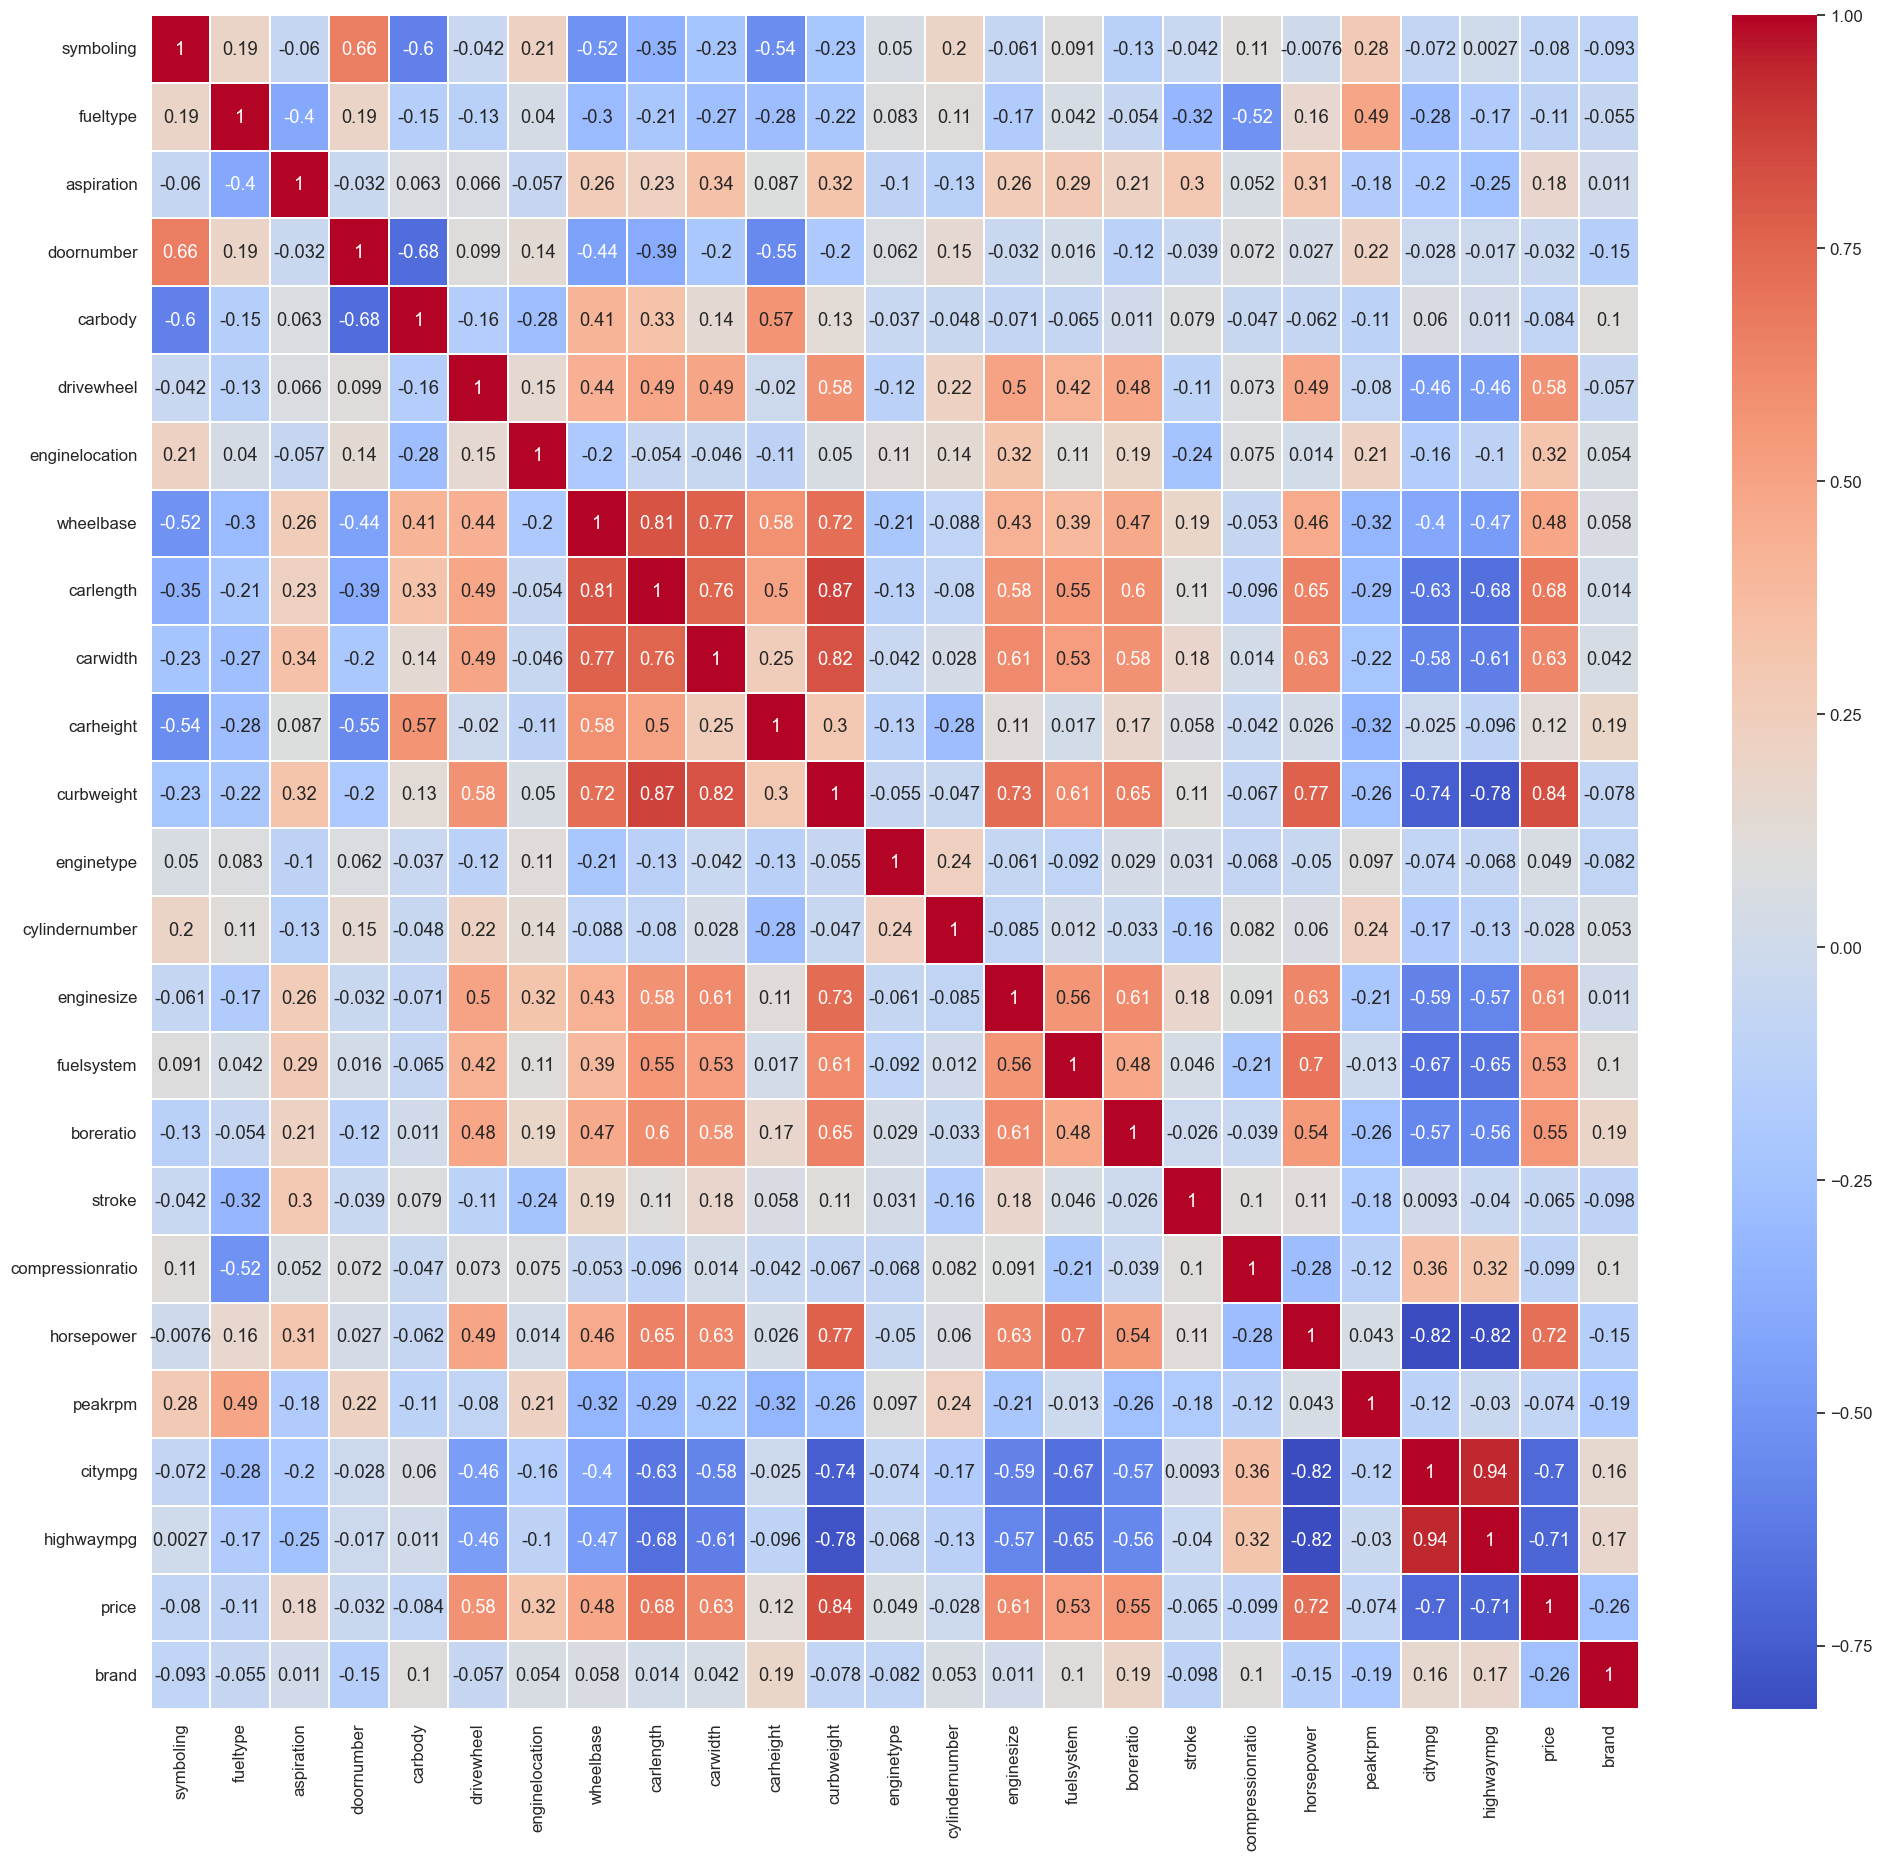

In [995]:
plt.figure(figsize=(24, 22))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=1.1)

## D. Modelling

### D.1 Defining X (Feature) and y (Target) Variables

In [996]:
# X_data = df.drop(columns=['price', 'car_ID', 'CarName', 'fueltype', 'aspiration', 'enginelocation', 'enginetype', 'cylindernumber', 'stroke', 'carbody', 'peakrpm', 'compressionratio', 'doornumber', 'symboling'])
X_data = df.drop(columns=['price'])
y_data = df['price']

### D.2 Splitting Data Train and Data Test (80:20)

In [997]:
def random_split(X_data, y_data, train_size=0.8, random_state=42):
    np.random.seed(random_state)
    
    # 1. Acak Indeks
    n_rows = len(X_data)
    indices = np.random.permutation(n_rows)
    
    # 2. Potong Indeks
    split_idx = int(n_rows * train_size)
    train_idx = indices[:split_idx]
    test_idx = indices[split_idx:]
    
    # 3. Ambil Datanya (Pakai .iloc biar gak error)
    X_train = X_data.iloc[train_idx].reset_index(drop=True)
    X_test = X_data.iloc[test_idx].reset_index(drop=True)
    y_train = y_data.iloc[train_idx].reset_index(drop=True)
    y_test = y_data.iloc[test_idx].reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = random_split(X_data, y_data)

### D.3 Decision Tree Regression 😭😭😭😭😭😭😭

#### Menghitung Variance Data

In [998]:
def hitung_score(groups):
    # Hitung total data di split ini
    n_instances = float(sum([len(group) for group in groups]))
    weighted_var = 0.0
    
    for group in groups:
        size = float(len(group))
        # Hindari pembagian dengan nol
        if size == 0:
            continue
        
        # Ambil kolom terakhir sebagai target (y)
        group_y = group.iloc[:, -1]
        
        # Mencari rata-rata dari kolom terakhir
        mean_val = group_y.mean()
        
        # Hitung Variance
        var = ((group_y - mean_val) ** 2).sum() / size
        
        # Hitung Weighted Variance
        weighted_var += var * (size / n_instances)
        
    return weighted_var

#### Melakukan Splitting Data

In [999]:
def split_data(df, feat_idx, threshold):
    # feat_idx: urutan kolom (0, 1, 2...)
    # threshold: nilai ambang batas
    
    # Ambil data yang nilainya KURANG DARI threshold (Kiri)
    left = df[df.iloc[:, feat_idx] < threshold]
    
    # Ambil data yang nilainya LEBIH DARI / SAMA DENGAN threshold (Kanan)
    right = df[df.iloc[:, feat_idx] >= threshold]
    
    return left, right

#### Mencari Best Split

In [1000]:
def get_best_split(df, min_sample):
    best_score = float('inf')
    best_split = {}
    n_features = df.shape[1] - 1
    
    for feat_idx in range(n_features):
        for index, row in df.iterrows():
            groups = split_data(df, feat_idx, row.iloc[feat_idx])
            
            left_group, right_group = groups
            
            # Jangan biarkan dia bikin daun isi 1 biji.
            if len(left_group) < min_sample or len(right_group) < min_sample:
                continue
            score = hitung_score(groups)
            
            if score < best_score:
                best_score = score
                best_split = {
                    'feat_idx' : feat_idx,
                    'val' : row.iloc[feat_idx],
                    'groups' : groups
                }
                
    return best_split

#### Membangun Pohon (Recursive)

In [1001]:
def to_terminal(group):
    return group.iloc[:, -1].mean()

def build_tree(df, depth, max_depth, min_sample):
    root = get_best_split(df, min_sample)
    if not root:
        return to_terminal(df)
    
    left, right = root['groups']
    del(root['groups'])
    
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root
    
    if len(df) < min_sample:
        return to_terminal(df)
    
    root['left'] = build_tree(left, depth + 1, max_depth, min_sample)
    root['right'] = build_tree(right, depth + 1, max_depth, min_sample)
    return root

#### Melakukan Prediksi

In [1002]:
# Prediksi untuk SATU baris data
def predict_row(node, row):
    # Kalau node ini adalah angka (hasil prediksi akhir / Leaf), langsung kembalikan
    if not isinstance(node, dict):
        return node
    
    # Kalau masih dictionary, berarti percabangan. Cek aturannya.
    if row.iloc[node['feat_idx']] < node['val']:
        # Belok Kiri
        return predict_row(node['left'], row)
    else:
        # Belok Kanan
        return predict_row(node['right'], row)

# Prediksi untuk SELURUH data test
def predict_batch(tree, df_test):
    predictions = []
    for index, row in df_test.iterrows():
        prediction = predict_row(tree, row)
        predictions.append(prediction)
    return predictions

## E. Evaluasi

### E.1 Memprediksi Hasil

In [1003]:
# Train data gabungan X & y
train_data = pd.concat([X_train, y_train], axis=1)

# Gunakan parameter TERBAIK yang sudah di-tuning
my_tree = build_tree(train_data, depth=0, max_depth=20, min_sample=4)

predictions = predict_batch(my_tree, X_test)
predictions_train = predict_batch(my_tree, X_train)

In [1004]:
# # Grid Search 2 Parameter (Depth & Min Samples)
# best_r2 = -float('inf')
# best_params = {}

# print("Mencari kombinasi terbaik...")
# print(f"{'Depth':<10} | {'Min Leaf':<10} | {'R2 Test':<10}")
# print("-" * 35)

# # Coba kombinasi ini
# depths = [4, 6, 8, 10, 12]
# min_leafs = [1, 5, 10, 15]  # Ini kuncinya! Coba angka 5, 10, 15

# for d in depths:
#     for leaf in min_leafs:
#         # Latih model dengan 2 parameter
#         # Pastikan build_tree kamu sudah support parameter 'min_samples_leaf' ya!
#         tree = build_tree(train_data, depth=0, max_depth=d, min_sample=leaf)
        
#         # Prediksi ke Test Data (Ujian Asli)
#         preds = predict_batch(tree, X_test)
        
#         # Hitung R2 Manual
#         y_true = np.array(y_test)
#         y_pred = np.array(preds)
#         ss_res = np.sum((y_true - y_pred)**2)
#         ss_tot = np.sum((y_true - np.mean(y_true))**2)
#         r2 = 1 - (ss_res / ss_tot)
        
#         print(f"{d:<10} | {leaf:<10} | {r2*100:.2f}%")
        
#         if r2 > best_r2:
#             best_r2 = r2
#             best_params = {'max_depth': d, 'min_samples_leaf': leaf}

# print("\n" + "="*40)
# print(f"JUARA: Depth {best_params['max_depth']} & Min Leaf {best_params['min_sample']}")
# print(f"R2 Score Test Tertinggi: {best_r2*100:.2f}%")
# print("="*40)

### E.2 MSE (Mean Squared Errors)

In [1005]:
error_test = y_test - predictions
error_train = y_train - predictions_train

In [1006]:
mse = np.mean((error_test) ** 2)
mse

np.float64(11667061.79720398)

### E.3 RMSE (Root Mean Squared Errors)

In [1007]:
rmse = np.sqrt(mse)
rmse

np.float64(3415.7080960181565)

### E.4 MAE (Mean Absolute Errors)

In [1008]:
mae = np.sum(np.abs(error_test))
mae

np.float64(97428.62032142858)

### E.5 R2_Squared (Akurasi Model)

#### Akurasi Test

In [1014]:
ss_res = np.sum((error_test) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"{r2:.2f}")

0.85


#### Akurasi Train

In [1015]:
ss_res_train = np.sum((error_train) ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)
print(f"{r2_train:.2f}")

0.95


### E.6 Visualisasi Regresi

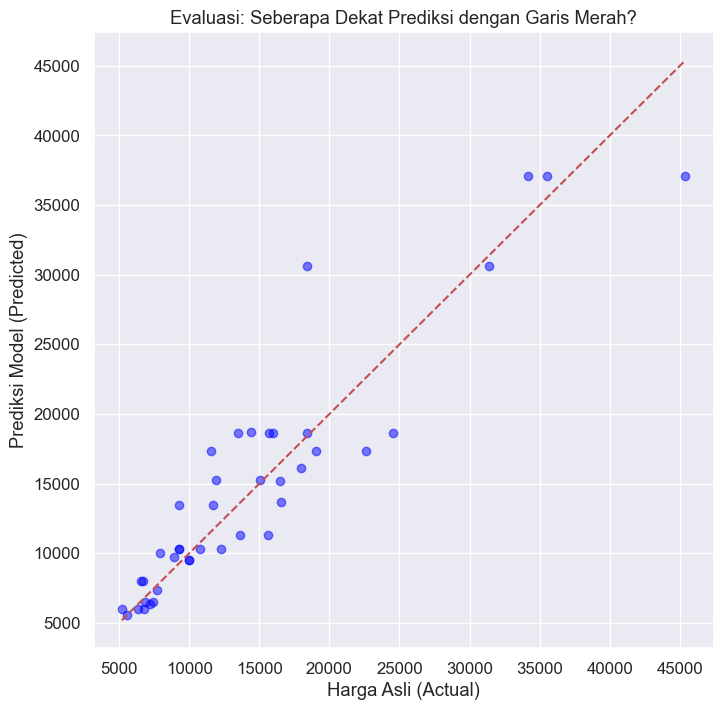

In [1011]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Harga Asli (Actual)')
plt.ylabel('Prediksi Model (Predicted)')
plt.title('Evaluasi: Seberapa Dekat Prediksi dengan Garis Merah?')
plt.show()

### E.7 Visualisasi Decision Tree

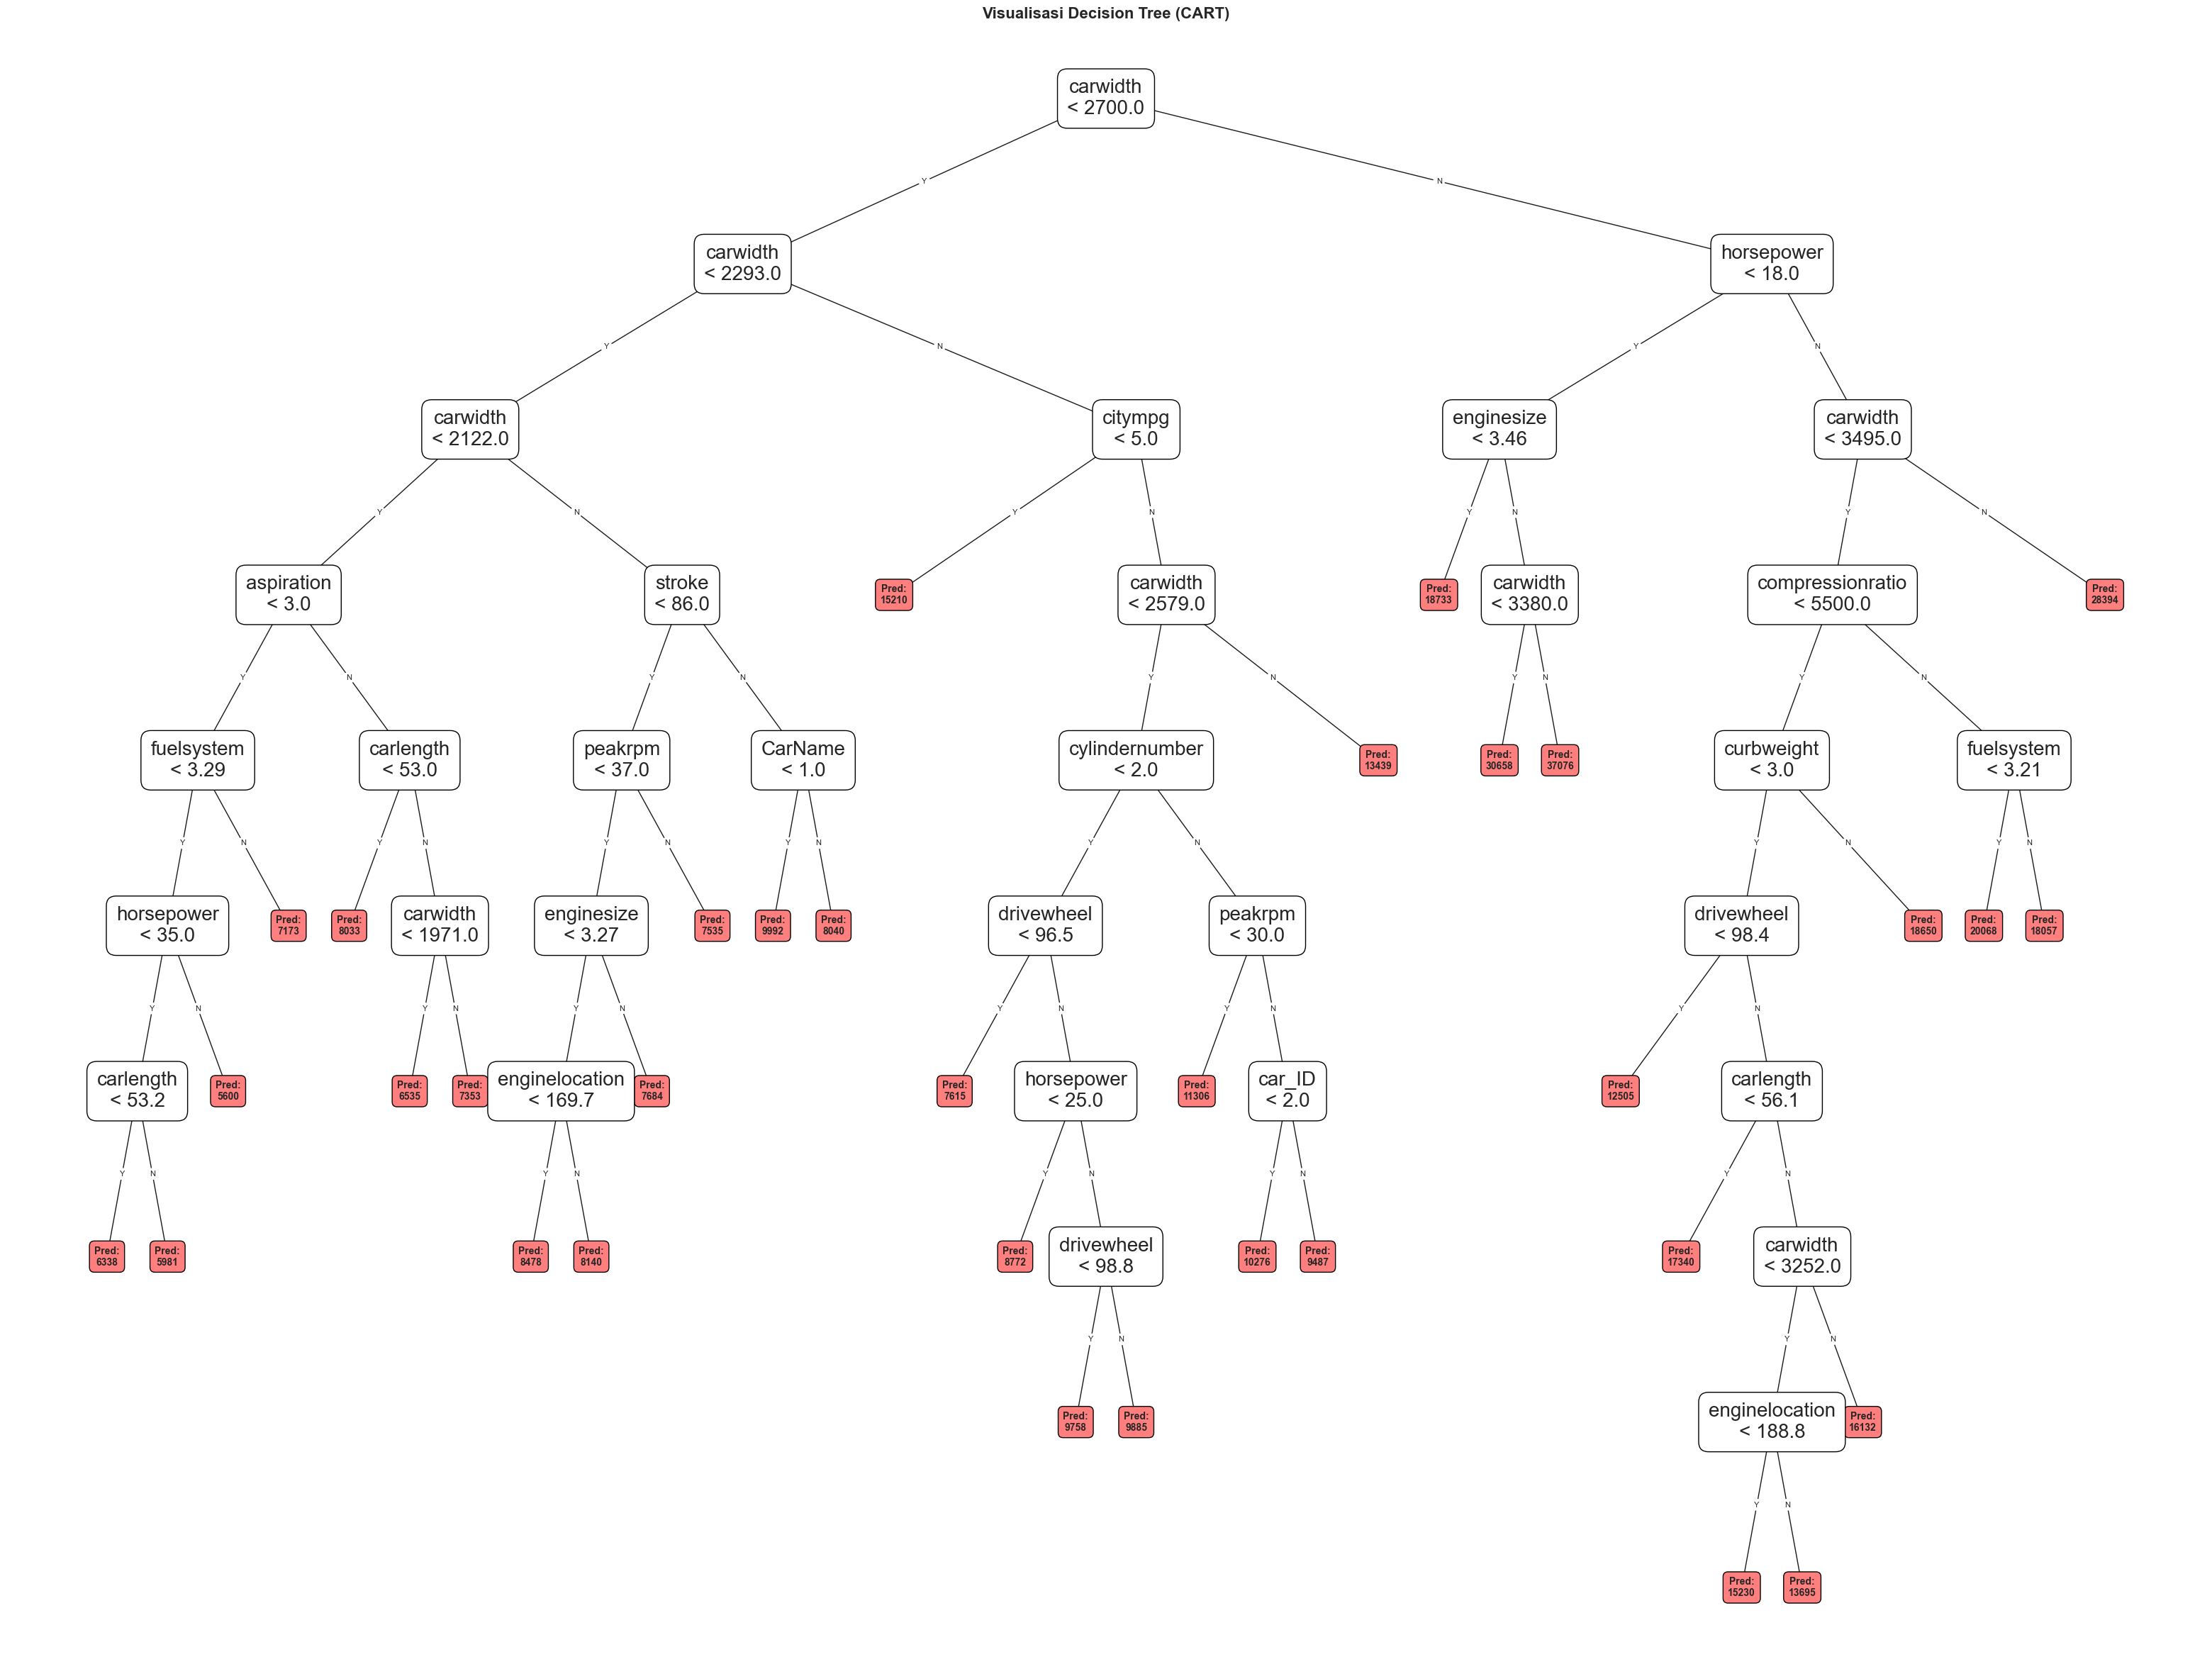

In [1012]:
def get_width(node):
    if not isinstance(node, dict):
        return 1
    return get_width(node['left']) + get_width(node['right'])

# 2. Fungsi Bantu: Hitung Kedalaman Pohon
def get_depth(node):
    if not isinstance(node, dict):
        return 1
    return max(get_depth(node['left']), get_depth(node['right'])) + 1

# 3. Fungsi Utama: Menggambar Pohon
def plot_tree_visual(node, feature_names, ax=None, 
                     left_lim=0, right_lim=10, y=10, level_height=2):
    
    # Kalau kanvas belum ada, bikin baru
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('off') # Hilangkan sumbu X/Y biar bersih

    # --- KONDISI 1: JIKA DAUN (LEAF) ---
    if not isinstance(node, dict):
        text = f"Pred:\n{int(node)}"
        
        # Warna: Hijau untuk Aman (0), Merah untuk Kecelakaan (1)
        color = "#90EE90" if node == 0 else "#FF7F7F" 
        bbox_props = dict(boxstyle="round,pad=0.5", fc=color, ec="black", lw=1)
        
        # Gambar kotak daun tepat di tengah area yang tersedia
        ax.text((left_lim + right_lim)/2, y, text, ha="center", va="center", 
                bbox=bbox_props, fontsize=10, fontweight='bold')
        return

    # --- KONDISI 2: JIKA CABANG (INTERNAL NODE) ---
    # Hitung titik tengah untuk node ini
    mid_x = (left_lim + right_lim) / 2
    
    # Ambil info fitur
    feat_name = feature_names[node['feat_idx']]
    threshold = node['val']
    text = f"{feat_name}\n< {threshold}"
    
    # Gambar kotak keputusan (Warna Putih)
    bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1)
    ax.text(mid_x, y, text, ha="center", va="center", bbox=bbox_props, fontsize=20, zorder=20)
    
    # --- LOGIKA POSISI ANAK ---
    # Kita bagi ruang horizontal berdasarkan jumlah daun anak kiri & kanan
    n_left = get_width(node['left'])
    n_right = get_width(node['right'])
    total_n = n_left + n_right
    
    # Tentukan garis pembatas area kiri dan kanan
    split_x = left_lim + (right_lim - left_lim) * (n_left / total_n)
    
    # Posisi Y anak (turun ke bawah)
    child_y = y - level_height
    
    # Titik tengah anak kiri & kanan
    left_child_x = (left_lim + split_x) / 2
    right_child_x = (split_x + right_lim) / 2
    
    # Gambar Garis ke Kiri (Yes/True)
    ax.plot([mid_x, left_child_x], [y, child_y], 'k-', lw=1)
    ax.text((mid_x + left_child_x)/2, (y + child_y)/2, "Y", 
            ha="center", va="center", fontsize=8, 
            bbox=dict(boxstyle="circle", fc="white", ec="none"))
    
    # Gambar Garis ke Kanan (No/False)
    ax.plot([mid_x, right_child_x], [y, child_y], 'k-', lw=1)
    ax.text((mid_x + right_child_x)/2, (y + child_y)/2, "N", 
            ha="center", va="center", fontsize=8, 
            bbox=dict(boxstyle="circle", fc="white", ec="none"))
    
    # --- REKURSIF: GAMBAR ANAKNYA ---
    plot_tree_visual(node['left'], feature_names, ax, left_lim, split_x, child_y, level_height)
    plot_tree_visual(node['right'], feature_names, ax, split_x, right_lim, child_y, level_height)

# --- CARA PAKAI ---
feature_names = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

plt.figure(figsize=(40, 30)) # Sesuaikan ukuran gambar
ax = plt.gca()
ax.axis('off')
plot_tree_visual(my_tree, feature_names, ax=ax)
plt.title("Visualisasi Decision Tree (CART)", fontsize=16, fontweight='bold')
plt.show()

### E.8 Visualisasi Decision Boundary

Melatih model mini untuk visualisasi...
Sedang memprediksi area (tunggu sebentar)...
Sedang memprediksi area (tunggu sebentar)...


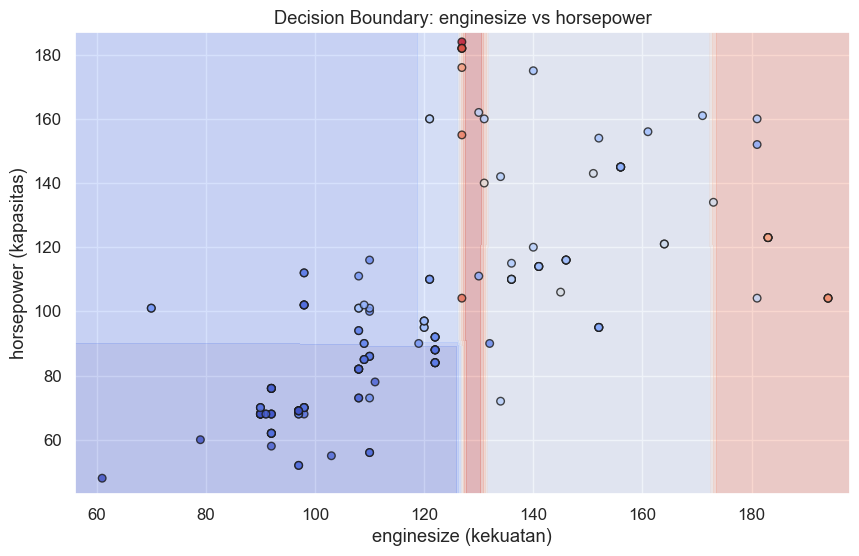

In [1013]:
feat_1 = 'enginesize'
feat_2 = 'horsepower'

# Ambil data khusus 2 kolom ini + Targetnya dari data balanced kamu
X_vis = train_data[[feat_1, feat_2]]
y_vis = train_data['price']
data_vis = pd.concat([X_vis, y_vis], axis=1)

print("Melatih model mini untuk visualisasi...")
# Latih pohon baru (simpel aja, depth 5) pakai fungsi buatanmu
# Pastikan 'unique_classes' sudah ada dari kode sebelumnya
tree_vis = build_tree(data_vis, depth=0, max_depth=5, min_sample=10) 

# --- 2. PERSIAPAN GRID (JARING TITIK) ---
# Bikin rentang X dan Y (biar gambarnya luas mencakup semua data)
x_min, x_max = X_vis[feat_1].min() - 5, X_vis[feat_1].max() + 5
y_min, y_max = X_vis[feat_2].min() - 5, X_vis[feat_2].max() + 5

# Bikin meshgrid (titik-titik halus buat background warna)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 2), # step 2 biar gak berat
                     np.arange(y_min, y_max, 2))

# --- 3. PREDIKSI AREA ---
# Siapkan data pura-pura dari grid tadi buat diprediksi
grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feat_1, feat_2])

# Pakai fungsi prediksimu yang 'predict_batch'
print("Sedang memprediksi area (tunggu sebentar)...")
Z = predict_batch(tree_vis, grid_data) 
Z = np.array(Z).reshape(xx.shape)

# --- 4. GAMBAR HASILNYA ---
plt.figure(figsize=(10, 6))

# Gambar daerah kekuasaan (Merah vs Biru)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Gambar titik data asli (Scatter Plot)
scatter = plt.scatter(X_vis[feat_1], X_vis[feat_2], c=y_vis, 
                      s=30, edgecolor='k', cmap='coolwarm', alpha=0.8)

plt.xlabel(f'{feat_1} (kekuatan)')
plt.ylabel(f'{feat_2} (kapasitas)')
plt.title(f'Decision Boundary: {feat_1} vs {feat_2}')
plt.show()